In [1]:
import h5py

from orangecontrib.bioinformatics.ncbi.gene import GeneMatcher

from tsne_functions import *

In [2]:
col_data=pd.read_table('passedQC_cellData.tsv',index_col=0)
col_by_region=col_data.groupby('region')
fov_cells=col_by_region.get_group('fov').index
per_cells=col_by_region.get_group('per').index

In [3]:
with h5py.File('scaledata.h5','r') as file:

    #As h5 file was saved in R it is imported as transposed
    data_int=pd.DataFrame(file.get('integrated/matrix')[:file.get('integrated/matrix').shape[0],:])
    data_int.columns=[name.decode() for name in file.get('integrated/rownames')]
    data_int.index=[name.decode() for name in file.get('integrated/colnames')[:file.get('integrated/colnames').shape[0]]]

In [4]:
ORGANISM=9606 # Human
def name_genes_entrez(gene_names: list, key_entrez: bool, organism: int = ORGANISM) -> dict:
    """
    Add entrez id to each gene name
    :param gene_names: Gene names (eg. from dictyBase)
    :param organism: organism ID
    :param key_entrez: True: Entrez IDs as keys and names as values, False: vice versa
    :return: Dict of gene names and matching Entres IDs for genes that have Entrez ID
    """
    entrez_names = dict()
    matcher = GeneMatcher(organism)
    matcher.genes = gene_names
    for gene in matcher.genes:
        name = gene.input_identifier
        entrez = gene.gene_id
        if entrez is not None:
            if key_entrez:
                entrez_names[entrez] = name
            else:
                entrez_names[name] = entrez
    return entrez_names

# Comparison of genes that have a standard gene symbol or do not

The below tSNE is based only on genes whose symbols match human gene symbols used in Orange GeneMatcher.

In [5]:
genes_all=data_int.columns
genes_known=name_genes_entrez(gene_names=genes_all, key_entrez=False)
print('N all variable genes:',len(genes_all),'vs N variable genes matching human symbols',len(genes_known))

N all variable genes: 3605 vs N variable genes matching human symbols 2252


/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "
/home/khrovatin/miniconda3/lib/python3.7/site-packages/numba/ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../miniconda3/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


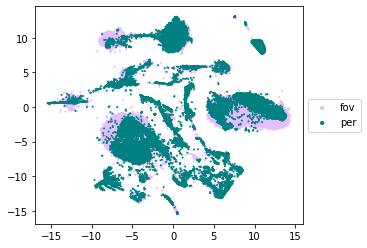

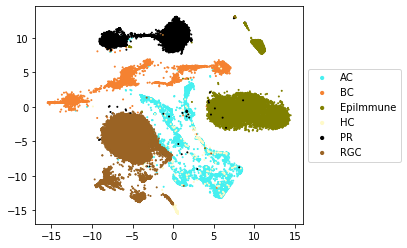

In [6]:
tsne_int=make_tsne(data_int.loc[:,genes_known])
col_data_int=col_data.loc[data_int.index,:]

plot_tsne([tsne_int],[dict(zip(col_data_int.index,col_data_int['region']))], [data_int.index], legend=True)
plot_tsne([tsne_int],[dict(zip(col_data_int.index,col_data_int['cell_type']))], [data_int.index], legend=True)

The six broadly defined cell types are still evident on the tSNE, despite reduced number of the used features (genes). For comparison with tSNE on all variable genes see plot in tSNE_KNN.ipynb under title Seurat scaled and batch (region) corrected data.